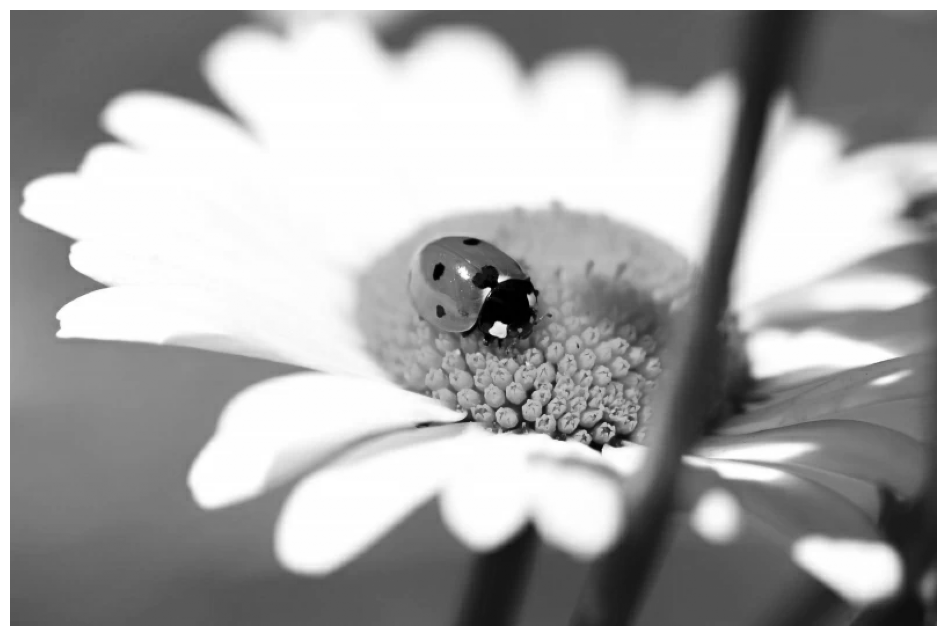

(532,)


In [13]:
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16,8]
A = imread('8.webp')
X = np.mean(A,-1) # convert RGB to grayscale

#img = plt.imshow(256-X)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()
U, S, VT = np.linalg.svd(X,full_matrices=False)
print(S.shape)


(532,)


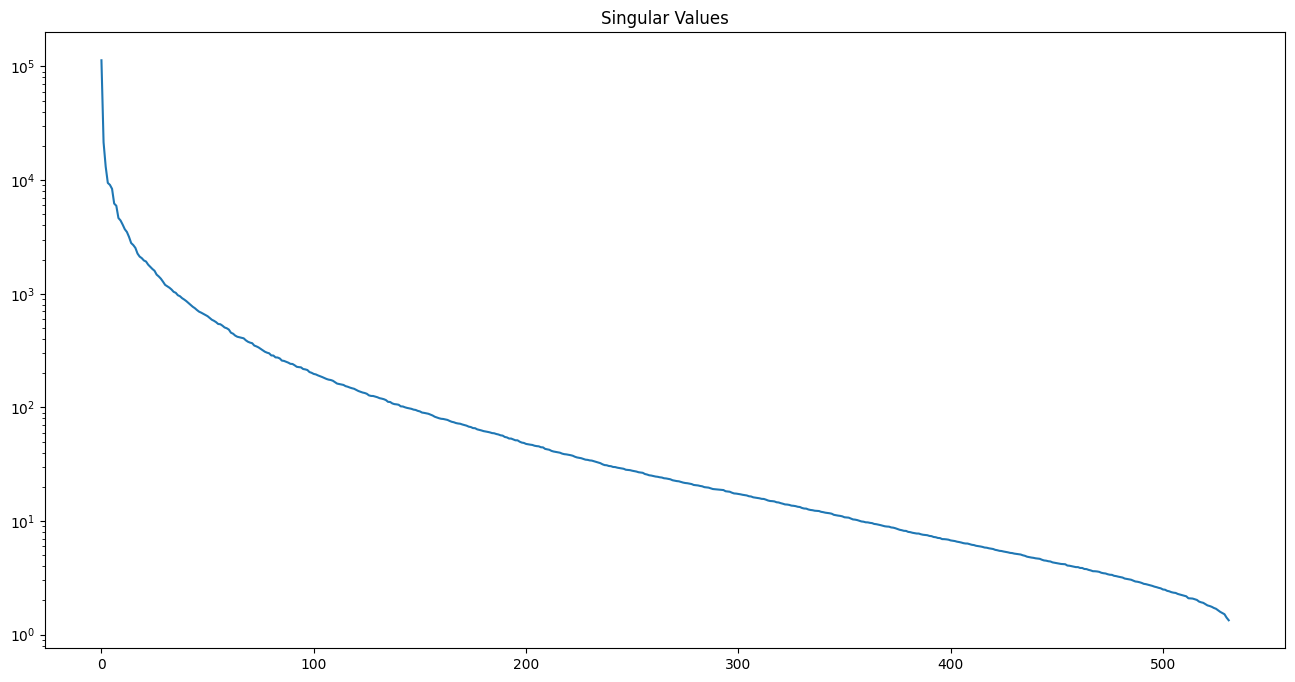

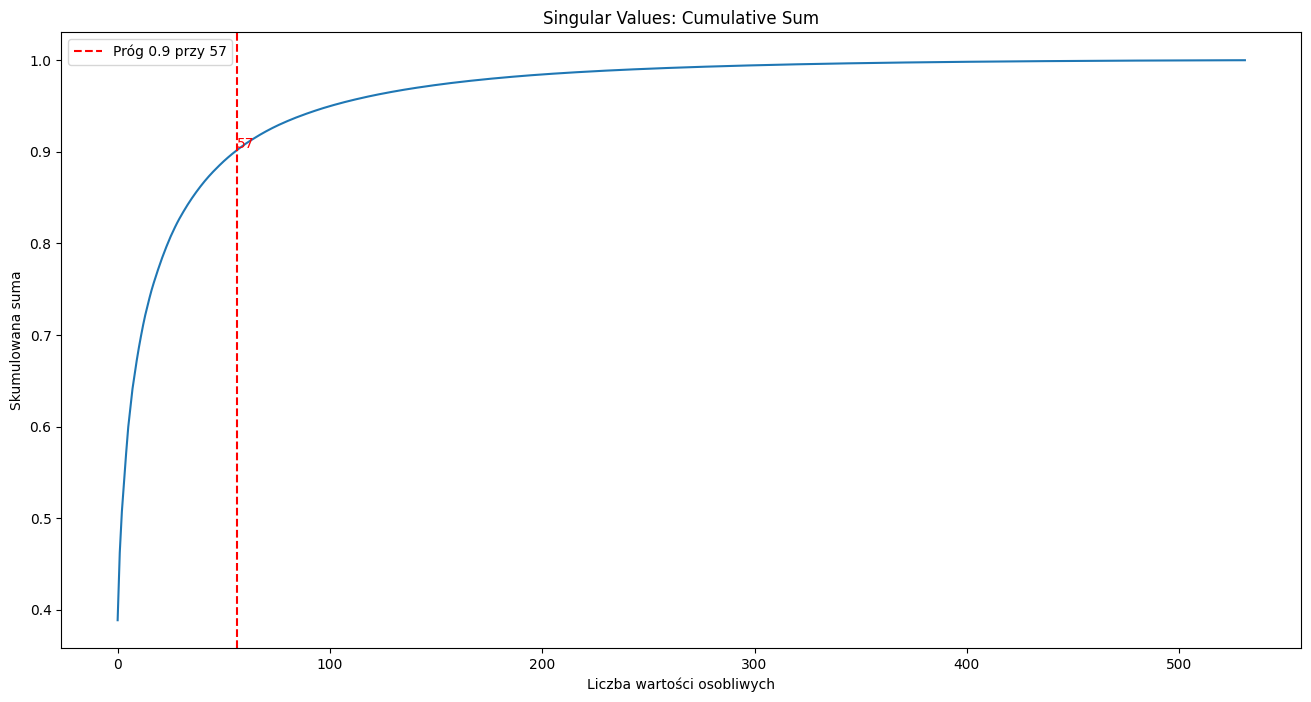

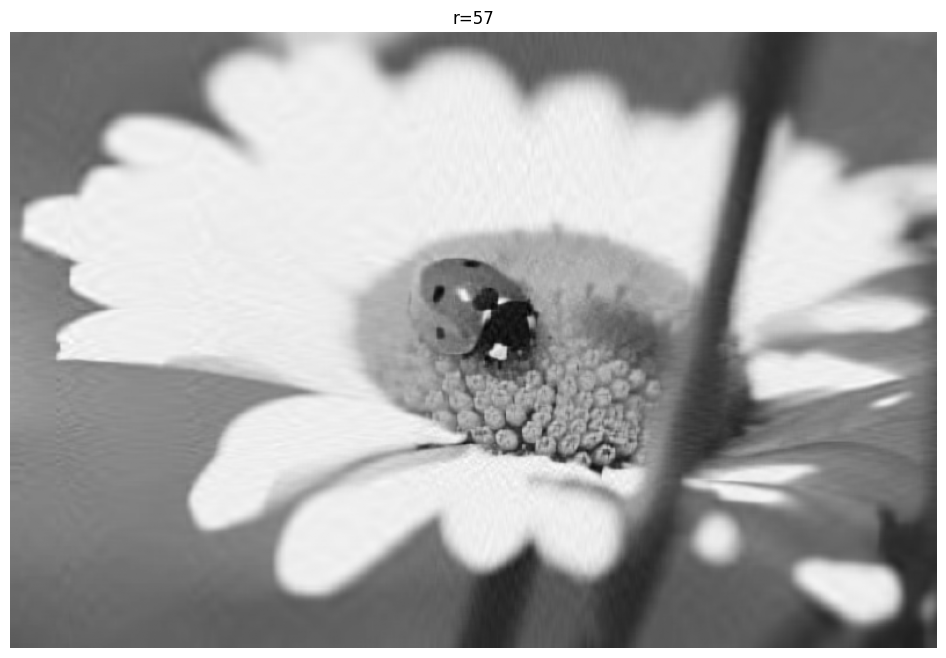

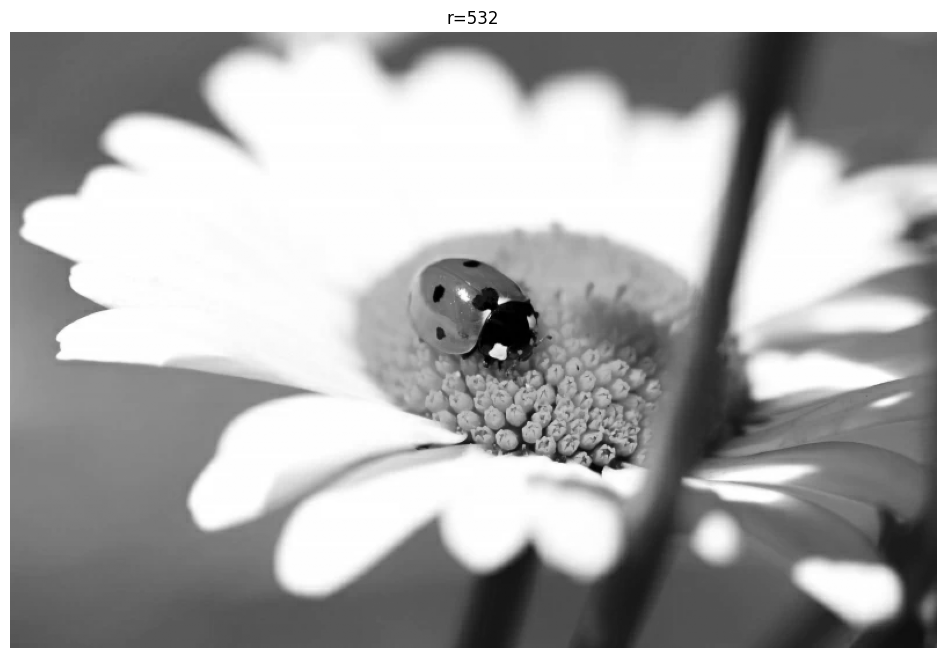

In [24]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
print(S.shape)
S = np.diag(S)

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

cumsum_values = np.cumsum(np.diag(S)) / np.sum(np.diag(S))
point_90 = np.argmax(cumsum_values > 0.9) + 1  
value_90 = cumsum_values[point_90 - 1]

plt.figure(2)
plt.plot(cumsum_values)
plt.axvline(x=point_90-1, color='r', linestyle='--', label=f'Próg 0.9 przy {point_90}')
plt.text(point_90-1, value_90, f'{point_90}', color='r', va='bottom')
plt.title('Singular Values: Cumulative Sum')
plt.xlabel('Liczba wartości osobliwych')
plt.ylabel('Skumulowana suma')
plt.legend()
plt.show()

j=0
for r in (57,532):
    # Construct approximate image
    Xapprox = U[:,:r]@S[0:r,:r]@VT[:r,:]
    plt.figure(j+1)
    j += 1
    #img = plt.imshow(256-Xapprox)
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r='+str(r))
    plt.show()


